In [1]:
import numpy as np
import h5py
import time
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
%matplotlib notebook
from collections import Counter
import math
import cv2
import scipy.stats
import seaborn as sns
import pandas as pd
import itertools

# Load data

In [2]:
file_paths = ["../predictions/20201119/bottomup/pred_FishTank20200416_160648/results/FishTank20200416_160648/FishTank20200416_160648.h5",
              "../predictions/20201119/bottomup/pred_FishTank20200413_154621/results/FishTank20200413_154621/FishTank20200413_154621.h5",
              "../predictions/20201120/pred_FishTank20200414_154100/results/FishTank20200414_154100/FishTank20200414_154100.h5",
              "../predictions/20201120/pred_FishTank20200415_154234/results/FishTank20200415_154234/FishTank20200415_154234.h5",
              "../predictions/20201120/pred_FishTank20200417_154139/results/FishTank20200417_154139/FishTank20200417_154139.h5",
              "../predictions/20201120/pred_FishTank20200418_160144/results/FishTank20200418_160144/FishTank20200418_160144.h5",
              "../predictions/20201120/pred_FishTank20200419_151352/results/FishTank20200419_151352/FishTank20200419_151352.h5",
              "../predictions/20201120/pred_FishTank20200419_173651/results/FishTank20200419_173651/FishTank20200419_173651.h5",
              "../predictions/20201120/pred_FishTank20200420_153056/results/FishTank20200420_153056/FishTank20200420_153056.h5",
              "../predictions/20201120/pred_FishTank20200420_175237/results/FishTank20200420_175237/FishTank20200420_175237.h5",
             ]

# All data variables
speeds_frametoframe = []
data_3D_filtered = []
angles_upperbody_360 = []
angles_upperbody_180 = []
upperbody_angles_xy = []
upperbody_angles_z = []
tail_angles_xy = []
tail_angles_z = []
speed_xyz = []
speed_upperbody_angles_xy = []
speed_upperbody_angles_z = []
speed_tail_angles_xy = []
speed_tail_angles_z = []
data_3D = []

for file_path in file_paths:
    with h5py.File(file_path, 'r') as f:
        data_3D.append(np.copy(f['tracks_3D']))
        speeds_frametoframe.append(np.copy(f['speed_frametoframe']))
        data_3D_filtered.append(np.copy(f['tracks_3D_no_outliers_60']))
        angles_upperbody_360.append(np.copy(f['upperbody_xy_angle_0to360']))
        angles_upperbody_180.append(np.copy(f['upperbody_xy_angle_180']))
        upperbody_angles_xy.append(np.copy(f['upperbody_xy_angle_additive']))
        upperbody_angles_z.append(np.copy(f['upperbody_z_angle']))
        tail_angles_xy.append(np.copy(f['tail_xy_angle']))
        tail_angles_z.append(np.copy(f['tail_z_angle']))
        speed_xyz.append(np.copy(f['speed_xyz']))
        speed_upperbody_angles_xy.append(np.copy(f['speed_upperbody_angles_xy']))
        speed_upperbody_angles_z.append(np.copy(f['speed_upperbody_angles_z']))
        speed_tail_angles_xy.append(np.copy(f['speed_tail_angles_xy']))
        speed_tail_angles_z.append(np.copy(f['speed_tail_angles_z']))
        
# relation to fishpair image tatsuo
fishpairs=["9_top",
           "7_down",
           "7_up",
           "9_down",
           "10_down",
           "10_up",
           "8_down",
           "6_down",
           "8_up",
           "6_up"
          ]

In [3]:
# with h5py.File("trackdata_part.h5", "w") as hf:
    
#     hf.create_dataset(fishpairs[0], data=data_3D[0])
#     hf.create_dataset(fishpairs[3], data=data_3D[3])
        


In [11]:
total = 0
counter = 0
for i in data_3D_filtered[0]:
    for j in i[0]:
        total += 1
        if np.any(np.isnan(j)):
            counter += 1
print(counter/total*100)

0.4617482435447584


In [13]:
print([i for i in range(2)])

[0, 1]


In [10]:
total = 0
for i in data_3D:
    total += len(i)
print(total/6000/60)

15.953905555555556


In [3]:
for i in range(len(data_3D[0])):
    if np.any(np.isnan(data_3D_filtered[0][i])):
        if not np.any(np.isnan(data_3D[0][i])):
            print(i)
            print(speeds_frametoframe[0][0][i-1],speeds_frametoframe[0][1][i-1],speeds_frametoframe[0][2][i-1])

1086
9.085205536618435 41.885739638739686 66.88060653044138
1210
24.80299416057291 14.299582224774937 68.50911517639472
1212
27.34574407570073 7.271752721042208 60.75368122577915
1235
64.7829515862249 29.984430535049437 74.18757796603283
1300
31.216507973760866 13.396238631014915 67.20716971191088
1302
45.274323723981745 30.906888479636365 64.22684040987004
1531
34.32488005649135 10.189112538906642 88.4992273548813
1712
82.95140819253382 12.411840816575408 48.941904076469804
1713
100.66671418383346 16.419749304916735 3.3265245674427755
1714
125.37321713723219 10.16738449989453 25.54314879501301
1715
204.5506166697602 31.891721173555325 68.20028148249739
2424
6.288300994918434 0.2745659558129558 103.87848283381267
2609
11.67016827565755 483.38079163880263 16.004376486430534
2615
2.705194439618707 465.90602365765204 21.234617582290923
2616
6.88933590414046 24.706090516193665 0.571286687604558
2619
25.103834531566072 62.4473535903766 21.42376235694516
2662
13.916776121996541 22.9721427309

# Functions

In [6]:
def missing_data(dataset, printing=False):
    missing = np.zeros(len(dataset))
    missing_bdps = [0,0,0]
    missed_frames = []

    for i, frame in enumerate(dataset):
        for j, bdp in enumerate(frame[0]):
            if np.any(np.isnan(bdp)):
                missing_bdps[j] += 1
                missing[i] += 1
                missed_frames.append(i)
                
    if not printing:
        print("missing [head, thorax, tail]:", missing_bdps)
        print("total missing bodypoints:", sum(missing_bdps))
        print(Counter(missing))
    
    unique_missing_frames = sorted(set(missed_frames))
    missed_frame_sequences = []
    if len(unique_missing_frames) > 0:
        sequence = [unique_missing_frames[0]]
    else:
        print("no missing frames")
        return
    
    for frame in unique_missing_frames[1:]:
        if frame - sequence[-1] < 2:
            sequence.append(frame)
        else:
            missed_frame_sequences.append(sequence)
            sequence = [frame]
    missed_frame_sequences.append(sequence)
    sequence_lengths = [len(i) for i in missed_frame_sequences]
    sequence_lengths, missed_frame_sequences = zip(*sorted(zip(sequence_lengths, missed_frame_sequences)))
    
    if not printing:
        print([i for i in sequence_lengths if i > 1])
    
    return(sum(missing_bdps))

def scatterplot_xyz(data, names):
    fig, axes = plt.subplots(1, len(names), sharey=True, squeeze=False)
    
    for i in range(len(names)):
        axes[0, i].scatter(data[-1], data[i], s=1)
        axes[0, i].set_title(names[i])
        axes[0, i].set_xlabel('frame number')
        axes[0, i].set_ylabel('position (cm)')
        
    plt.show()
    return

def histograms_xyz(data, names):
    fig, axes = plt.subplots(1, len(names), sharey=True, squeeze=False)
    
    for i in range(len(names)):
        axes[0, i].hist(data[i], density=True, bins=400)
#         axes[0, i].set_xlim(0,40)
        axes[0, i].set_title(names[i])
        axes[0, i].set_xlabel('position (cm)')
        axes[0, i].set_ylabel('denisty')
        
    plt.show()
    
    return

def heatmap_plot(xd, yd, title):
    # Create heatmap
    xd_new = []
    yd_new = []
    for i in range(len(yd)):
        if np.any(np.isnan([xd[i], yd[i]])):
            continue
        else:
            xd_new.append(xd[i])
            yd_new.append(yd[i])
    heatmap, xedges, yedges = np.histogram2d(yd_new, xd_new, bins=(64,64))

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    # Plot heatmap
    plt.figure()
    plt.clf()
    plt.title(title)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.ylim(0, 40)
    plt.xlim(0, 40)
    plt.imshow(heatmap, extent=extent, origin='lower')
    plt.colorbar()
    plt.show()
    
    return

def bodypoint_positions(dataset, names=['x', 'y', 'z'], plots=[True, True, True], bodypoint="thorax", frame_range=None):
    
    # take coordinates for one bodypoint
    bodypoints = {"head": 0, "thorax": 1, "tail": 2}
    if frame_range:
        coords = dataset[frame_range[0]:frame_range[-1], 0, bodypoints[bodypoint], :]
        linsp = np.linspace(frame_range[0], frame_range[-1], frame_range[-1] - frame_range[0])
    else:
        coords = dataset[:, 0, bodypoints[bodypoint], :]
        linsp = np.linspace(0, len(coords)-1, len(coords))
        
    x = coords[:, 0]
    y = coords[:, 1]
    z = coords[:, 2]
    
    data_plots = []
    for i in names:
        if i == 'x':
            data_plots.append(x)
        elif i == 'y':
            data_plots.append(y)
        elif i == 'z':
            data_plots.append(z)
    data_plots.append(linsp)
    
    if plots[0]:
        scatterplot_xyz(data_plots, names)
    if plots[1]:
        histograms_xyz(data_plots, names)
    if plots[2]:
        heatmap_plot(x, y, bodypoint + ' xy heatmap (specfic range: {})'.format(frame_range))
    
    return

def animate_scatters(iteration, data, scatters, lines, scatter_projections, lines_projections, text, all_timestamps):
    """
    Update the data held by the scatter plot and therefore animates it.

    Args:
        iteration (int): Current iteration of the animation
        data (list): List of the data positions at each iteration.
        scatters (list): List of all the scatters (One per element)

    Returns:
        list: List of scatters (One per element) with new coordinates
    """
    #if np.mod(iteration, 100) == 0:
        #print(iteration)
    # parse the input shapes
    numFrames, numFish, numBodyPoints, _ = data.shape
    # update the scatters
    for fishIdx in range(numFish):
        for bpIdx in range(numBodyPoints):
            scatters[fishIdx][bpIdx]._offsets3d = (data[iteration,fishIdx,bpIdx,0:1],
                                                   data[iteration,fishIdx,bpIdx,1:2],
                                                   data[iteration,fishIdx,bpIdx,2:])
            
    # update the lines
    for fishIdx,line in enumerate(lines):
        line.set_data(data[iteration, fishIdx, :, :2].swapaxes(0,1))
        line.set_3d_properties(data[iteration, fishIdx, :, 2])
        
        
    # update the text
    text.set_text(all_timestamps[iteration])
        
    # -------------- #
    for projectionIdx in range(3):
        
        # XZ => Y=0
        if projectionIdx == 0:
            projectionData = np.copy(data[iteration])
            projectionData[:, :, 1] = 0
        # XY => Z=0
        elif projectionIdx == 1:
            projectionData = np.copy(data[iteration])
            projectionData[:, :, 2] = 0
        # YZ => X=0
        elif projectionIdx == 2:
            projectionData = np.copy(data[iteration])
            projectionData[:, :, 0] = 0
            
        proj_scatters = scatter_projections[projectionIdx]
        proj_lines = lines_projections[projectionIdx]
        
        # update the scatters
        for fishIdx in range(numFish):
            for bpIdx in range(numBodyPoints):
                proj_scatters[fishIdx][bpIdx]._offsets3d = (projectionData[fishIdx,bpIdx,0:1],
                                                            projectionData[fishIdx,bpIdx,1:2],
                                                            projectionData[fishIdx,bpIdx,2:])
        # update the lines
        for fishIdx,line in enumerate(proj_lines):
            line.set_data(projectionData[fishIdx, :, :2].swapaxes(0,1))
            line.set_3d_properties(projectionData[fishIdx, :, 2])

    return




def make_movie(data, f0, fE, savePath='/home/liam/temp/testanimation.mp4'):
    """
    Creates the 3D figure and animates it with the input data.

    Args:
        data (list): List of the data positions at each iteration.
        save (bool): Whether to save the recording of the animation. (Default to False).
    """
    data = data[f0:fE]
    
    # parse the input shapes
    numFrames, numFish, numBodyPoints, _ = data.shape
    fish_colors = ['red', 'blue']

    # Attaching 3D axis to the figure
    fig = plt.figure()
    fig.tight_layout()
    ax = p3.Axes3D(fig, [0.,0.,1.,1.])

    # Initialize scatters (list over fish, list over bps)
    symbols = ['o', 's', 'x']
    sizes=12
    
    # Main scatters
    scatters = []
    for fishIdx in range(numFish):
        col = fish_colors[fishIdx]
        fish_scatters = []
        for bpIdx in range(numBodyPoints):
            fish_scatters.append(ax.scatter(data[0,fishIdx,bpIdx,0:1], data[0,fishIdx,bpIdx,1:2], data[0,fishIdx,bpIdx,2:], 
                                            c=col, s=sizes, marker=symbols[bpIdx])) 
        scatters.append(fish_scatters)
        
    # Main lines
    lines = []
    for fishIdx in range(numFish):
        col = fish_colors[fishIdx]
        line = ax.plot(data[0, fishIdx, :, 0], data[0, fishIdx, :, 1], data[0, fishIdx, :, 2], c=col)[0]
        lines.append(line)
        
    # ----------------
    # projections
    symbols = ['x', 'o', 's']
    sizes=5

    scatter_projections = []
    lines_projections = []
    for projectionIdx in range(3):
        proj_scatters = []
        proj_lines = []
        for fishIdx in range(numFish):
            col = fish_colors[fishIdx]
            # scatter plots
            fish_scatters = []
            for bpIdx in range(numBodyPoints):
                #print(symbols[bpIdx])
                fish_scatters.append(ax.scatter(data[0,fishIdx,bpIdx,0:1], data[0,fishIdx,bpIdx,1:2], data[0,fishIdx,bpIdx,2:], 
                                                c=col, s=sizes, marker=symbols[bpIdx], alpha=0.1))
            # lines
            line = ax.plot(data[0, fishIdx, :, 0], data[0, fishIdx, :, 1], data[0, fishIdx, :, 2], c=col, alpha=0.1)[0]
            proj_lines.append(line)
            proj_scatters.append(fish_scatters)
        
        scatter_projections.append(proj_scatters)
        lines_projections.append(proj_lines)
    # ----------------
    
    # the text
    all_timestamps = ['frame: '+ str(i).zfill(7) for i in range(f0, fE)]
    time_text = ax.text(14, 0, 43,'', fontsize=15)

    # Setting the axes properties
    ax.set_xlim3d([0, 40])
    ax.set_xlabel('X')

    ax.set_ylim3d([0, 40])
    ax.set_ylabel('Y')

    ax.set_zlim3d([0, 40])
    ax.set_zlabel('Z')

    # Provide starting angle for the view
    elevation_angle = 10
    azimuthal_angle = 45
    ax.view_init(elevation_angle, azimuthal_angle)

    ani = animation.FuncAnimation(fig, animate_scatters, numFrames, fargs=(data, scatters, lines, 
                                                                           scatter_projections, lines_projections,
                                                                           time_text, all_timestamps),
                                       interval=10, blit=False, repeat=True)

    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=20, metadata=dict(artist='LOS'), bitrate=3500)
    ani.save(savePath, writer=writer)
    return

def scatter_plot(data, words=['title', 'xlabel', 'ylabel'], labels=[]):
    plt.figure()
    if len(labels) > 0 and len(data) == len(labels):
        for i in range(len(data)):
            plt.plot(np.linspace(0, len(data[i])-1, len(data[i])), data[i], label=labels[i])
        plt.legend()
    else:
        plt.plot(np.linspace(0, len(data[0])-1, len(data[0])), data[0])
    plt.title(words[0])
    plt.xlabel(words[1])
    plt.ylabel(words[2])
    plt.show()
    return

def histogram_plot(data, words=['title', 'xlabel', 'ylabel'], labels=[]):
    plt.figure()
    if len(labels) > 0 and len(data) == len(labels):
        for i in range(len(data)):
            plt.hist(data[i], bins=100, label=labels[i], histtype='step',density=True)
        plt.legend()
    else:
        plt.hist(data[0], bins=100)
    plt.title(words[0])
    plt.xlabel(words[1])
    plt.ylabel(words[2])
    plt.show()
    
    plt.savefig(words[0] + '.png',dpi=300)
    
    return

def correlation(data1, data2, offset, shift=False):
    
    if not shift:
        data1_nonnan = []
        data2_nonnan = []

        for i in range(len(data1)):
            data1_i = data1[i]
            data2_i = data2[i]
            if not np.any(np.isnan([data1_i, data2_i])):
                data1_nonnan.append(data1_i)
                data2_nonnan.append(data2_i)
                
        data1 = data1_nonnan
        data2 = data2_nonnan
    
#     scatter_plot([data1, data2], labels=['1', '2'])
    x = []
    y = []
    
    for i in range(max(0,offset), len(data1) - max(0, offset)):
        x.append(data1[i + offset])
        y.append(data2[i])
    
    pearson = scipy.stats.pearsonr(x, y)    # Pearson's r
    spearman = scipy.stats.spearmanr(x, y)   # Spearman's rho
    kendall = scipy.stats.kendalltau(x, y)  # Kendall's tau
    
#     print(pearson)
    
    return [pearson[0], spearman[0], kendall[0]], [pearson[1], spearman[1], kendall[1]]

def corr_shift(data1, data2, off_range):
    data1_nonnan = []
    data2_nonnan = []
    
    for i in range(len(data1)):
        data1_i = data1[i]
        data2_i = data2[i]
        if not np.any(np.isnan([data1_i, data2_i])):
            data1_nonnan.append(data1_i)
            data2_nonnan.append(data2_i)
    
#     plt.figure()
#     plt.scatter(data1_nonnan, data2_nonnan)
#     plt.show()
    
    p = []
    s = []
    k = []
    x = []
    
    for i in range(off_range[0], off_range[1]):
        x.append(i)
        corr, pvals = correlation(data1_nonnan, data2_nonnan, i, True)
        p.append(corr[0])
        s.append(corr[1])
        k.append(corr[2])
    
    return [x, p, s, k]

def plot_corr_shift(data, title):
    plt.figure()
    plt.plot(data[0],data[1],label='pearsonr')
    plt.plot(data[0],data[2],label='spearmanr')
    plt.plot(data[0],data[3],label='kendalltau')
    plt.title(title)
    plt.xlabel("frame shift")
    plt.legend()
    plt.show()
    return

def abs_speed(data, bdyp):
    return [np.sqrt(i[0]**2+i[1]**2+i[2]**2) for i in data[:, bdyp]]

def filter_nans(datasets):
    datasets_nonnan = [[] for i in datasets]
    for i in range(len(datasets[0])):
#         print([j[i] for j in datasets])
        if not np.any(np.isnan([j[i] for j in datasets])):
            for j, data in enumerate(datasets):
                datasets_nonnan[j].append(data[i])
    return datasets_nonnan

def correlation_matrix(experiment):
    datasets = (angles_upperbody_180[experiment], 
                upperbody_angles_z[experiment],
                tail_angles_xy[experiment],
                tail_angles_z[experiment],
                abs_speed(speed_xyz[experiment], 1),
                speed_upperbody_angles_xy[experiment],
                speed_upperbody_angles_z[experiment],
                speed_tail_angles_xy[experiment],
                speed_tail_angles_z[experiment],
               )

    datasets_nonan = filter_nans(datasets)

    features = ["angles_upperbody_180", 
                "upperbody_angles_z",
                "tail_angles_xy",
                "tail_angles_z",
                "abs_speed_thorax",
                "speed_upperbody_angles_xy",
                "speed_upperbody_angles_z",
                "speed_tail_angles_xy",
                "speed_tail_angles_z",
               ]

    df = pd.DataFrame(datasets_nonan, index=features).T

    correlation_mat = df.corr(method='pearson')

    plt.figure(figsize=(10,5))
    sns.heatmap(correlation_mat, annot = True)
    plt.tight_layout()
    plt.show()
    
    return

def correlation_parts(data1, data2, size):
    ays=[]
    for i in range(round(len(data1)/size)-1):
        try:
            a,b = correlation(data1[i*size:size+i*size], data2[i*size:size+i*size], 0)
            ays.append(a[0])
        except:
            continue
    return(ays)

# Low speed filter and angle in z direction

In [63]:
lowspeeds_zangles = []
speeds = abs_speed(speed_xyz[4], 1)
for i in range(len(data_3D_filtered[4])):
    if speeds[i] < 0.5:
        lowspeeds_zangles.append(tail_angles_z[4][i])

<IPython.core.display.Javascript object>


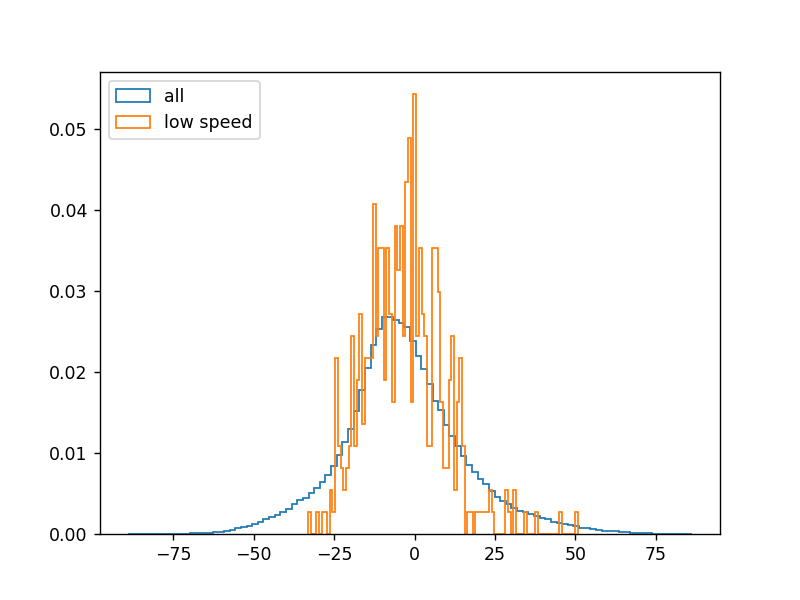

In [64]:
plt.figure()
plt.hist(tail_angles_z[4],density=True,bins=100,histtype='step',label='all')
plt.hist(lowspeeds_zangles,density=True,bins=100,histtype='step',label="low speed")
plt.legend()
plt.show()

# Acceleration ftf

In [19]:
acc_ftf = []
for i in speeds_frametoframe:
    for j in i:
        for k in range(1,len(j)):
            acc_ftf.append(abs(j[k]-j[k-1])*100)

<IPython.core.display.Javascript object>


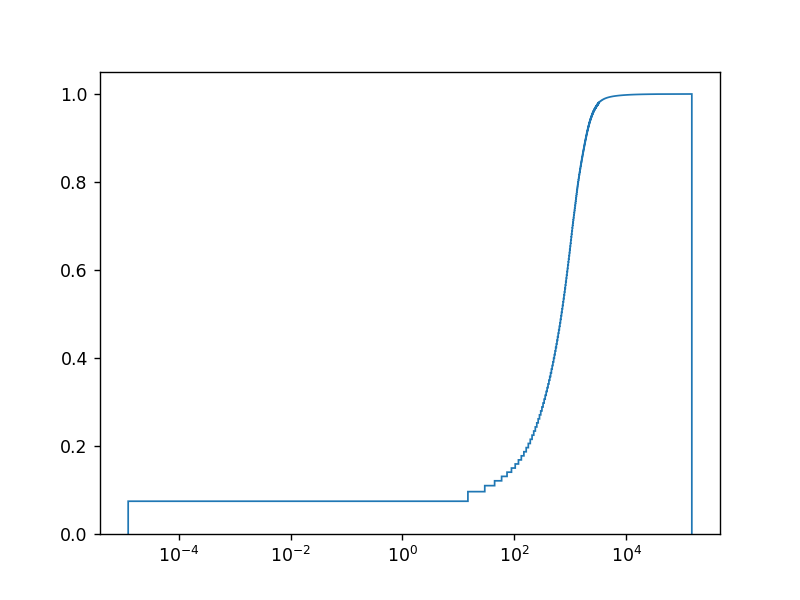

In [21]:
plt.figure()
plt.hist(acc_ftf,density=True,bins=10000,cumulative=True,histtype="step")
plt.xscale("log")
plt.show()

<IPython.core.display.Javascript object>


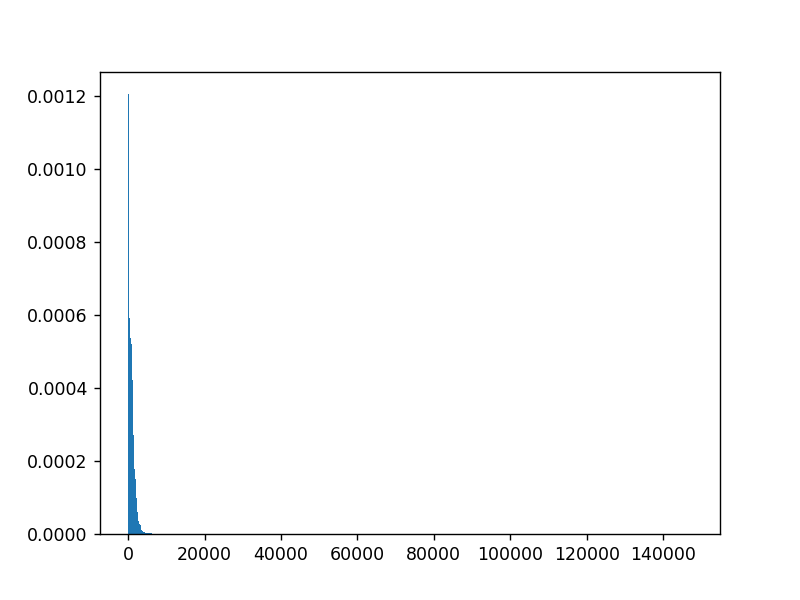

In [22]:
plt.figure()
plt.hist(acc_ftf,density=True, bins=1000)
plt.show()

# Output of missing data

<IPython.core.display.Javascript object>


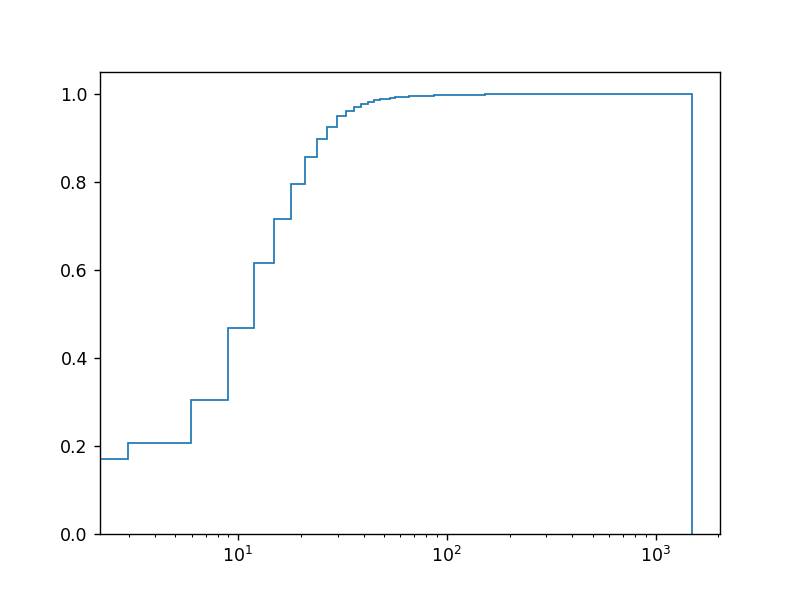

In [10]:
plt.figure()
hist = plt.hist(list(itertools.chain(*(list(itertools.chain(*speeds_frametoframe))))),density=True,bins=500,cumulative=True, histtype="step")
plt.xscale("log")

In [6]:
# check missing data
for i in range(len(data_3D)):
    missing_a = missing_data(data_3D[i], printing=True)
    missing_b = missing_data(data_3D_filtered[i], printing=True)
    factor = len(data_3D[i]) * 3 / 100
    print("experiment {}".format(i))
    print("{0:.2f}% of bodypoints not tracked".format(missing_a / factor))
    print("{0:.2f}% of bodypoints lost by filtering outliers".format((missing_b - missing_a)/factor))
    print()

experiment 0
0.02% of bodypoints not tracked
0.44% of bodypoints lost by filtering outliers

experiment 1
0.05% of bodypoints not tracked
0.43% of bodypoints lost by filtering outliers

experiment 2
0.47% of bodypoints not tracked
1.10% of bodypoints lost by filtering outliers

experiment 3
0.41% of bodypoints not tracked
0.12% of bodypoints lost by filtering outliers

experiment 4
0.07% of bodypoints not tracked
0.91% of bodypoints lost by filtering outliers

experiment 5
0.00% of bodypoints not tracked
0.51% of bodypoints lost by filtering outliers

experiment 6
0.11% of bodypoints not tracked
0.94% of bodypoints lost by filtering outliers

experiment 7
0.23% of bodypoints not tracked
0.79% of bodypoints lost by filtering outliers

experiment 8
0.11% of bodypoints not tracked
1.07% of bodypoints lost by filtering outliers

experiment 9
0.31% of bodypoints not tracked
0.94% of bodypoints lost by filtering outliers



# Data visualisation

<IPython.core.display.Javascript object>


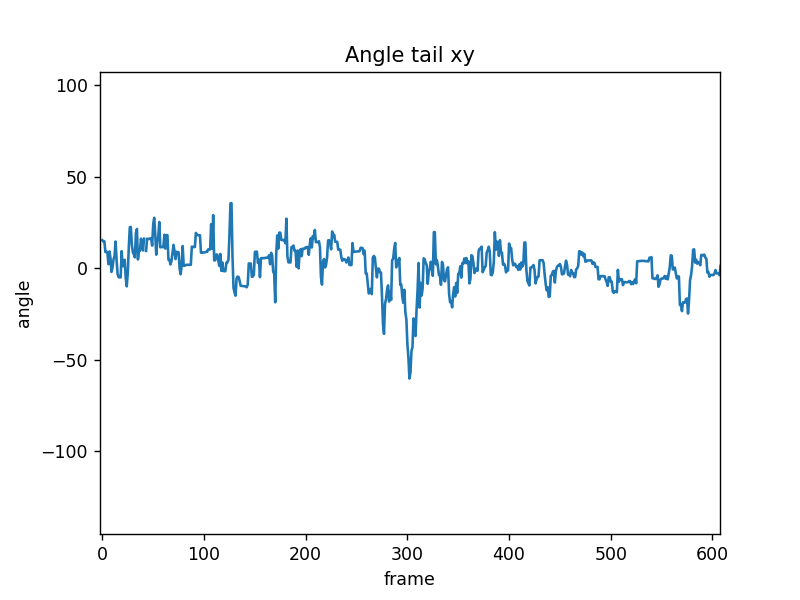

In [88]:
scatter_plot([tail_angles_xy[0]], ['Angle tail xy', 'frame', 'angle'], ["absolute", "additive"])

In [25]:
print(len(speed_xyz[0]))

573978


<IPython.core.display.Javascript object>


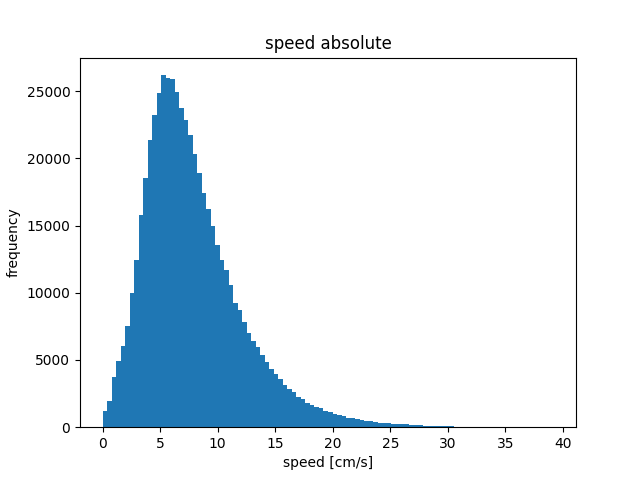

In [26]:
histogram_plot([abs_speed(speed_xyz[i], 1) for i in [0]], ['speed absolute', 'speed [cm/s]', 'frequency'])
# histogram_plot([speed_tail_angles_xy[i] for i in [0]], ['speed tail angles xy', 'speed [degrees/s]', 'frequency'])
# histogram_plot([speed_upperbody_angles_z[i] for i in [0]], ['speed upperbody angles z', 'speed [degrees/s]', 'frequency'])
# histogram_plot([speed_tail_angles_z[i] for i in [0]], ['speed tail angles z', 'speed [degrees/s]', 'frequency'])

<IPython.core.display.Javascript object>


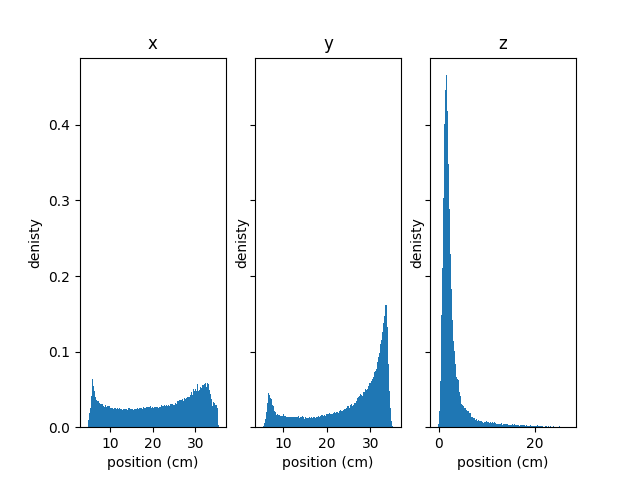

In [7]:
bodypoint_positions(data_3D_filtered[0], plots=[False, True, False], names=['x', 'y', 'z'], frame_range=None)

In [10]:
# # make the movie

# t0 = time.time()

# # frame range
# f0 = 250400
# fE = 250600

# make_movie(data, f0, fE, savePath='./0_250400_250600.mp4')

# tE = time.time()
# print(tE-t0)

# Correlation shift

In [11]:
shift_corr_speed_body_tail_xy = corr_shift(speed_upperbody_angles_xy[0], speed_tail_angles_xy[0], [-50,50])

<IPython.core.display.Javascript object>


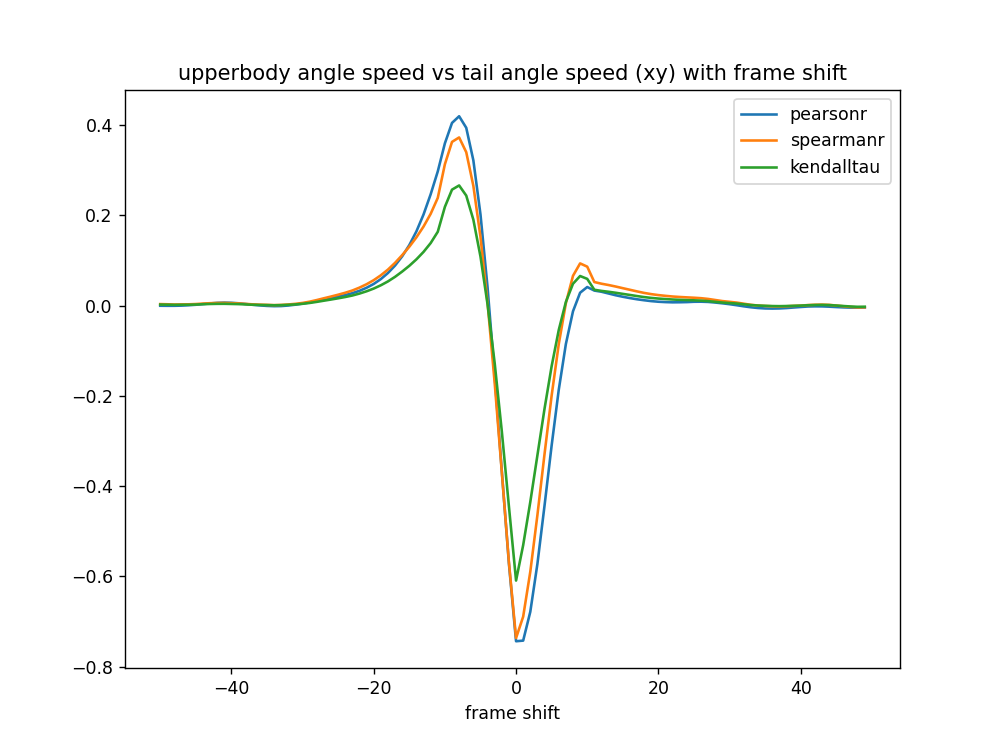

In [12]:
plot_corr_shift(shift_corr_speed_body_tail_xy, "upperbody angle speed vs tail angle speed (xy) with frame shift")

In [13]:
shift_corr_angle_body_tail_z = corr_shift(upperbody_angles_z[0], tail_angles_z[0], [-50,50])

<IPython.core.display.Javascript object>


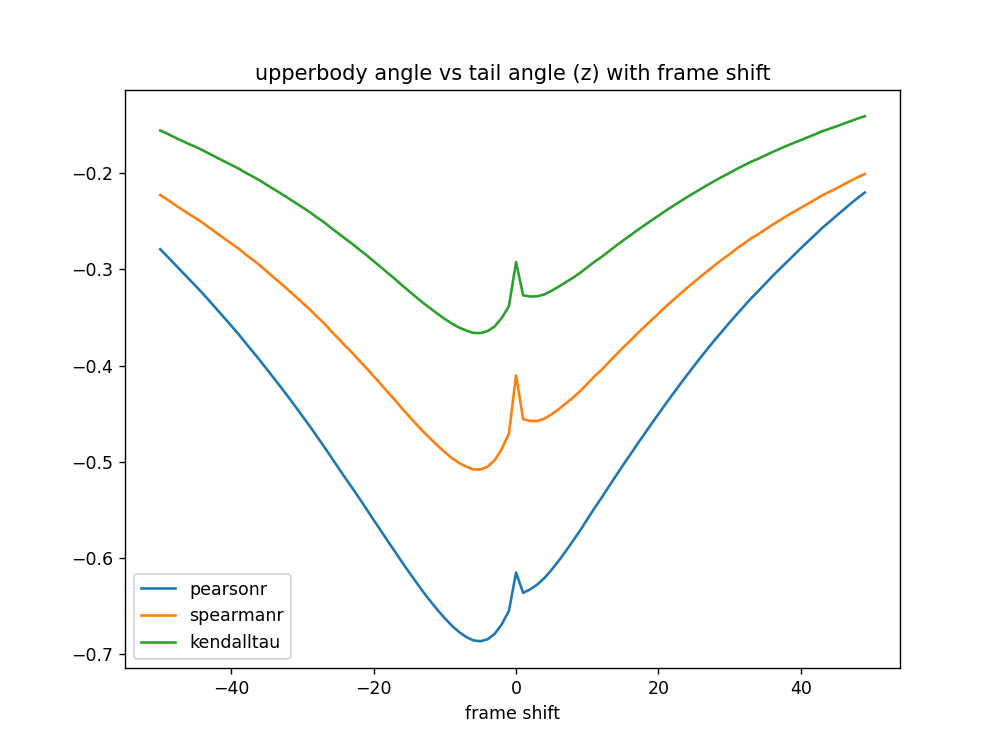

In [14]:
plot_corr_shift(shift_corr_angle_body_tail_z, "upperbody angle vs tail angle (z) with frame shift")

<IPython.core.display.Javascript object>


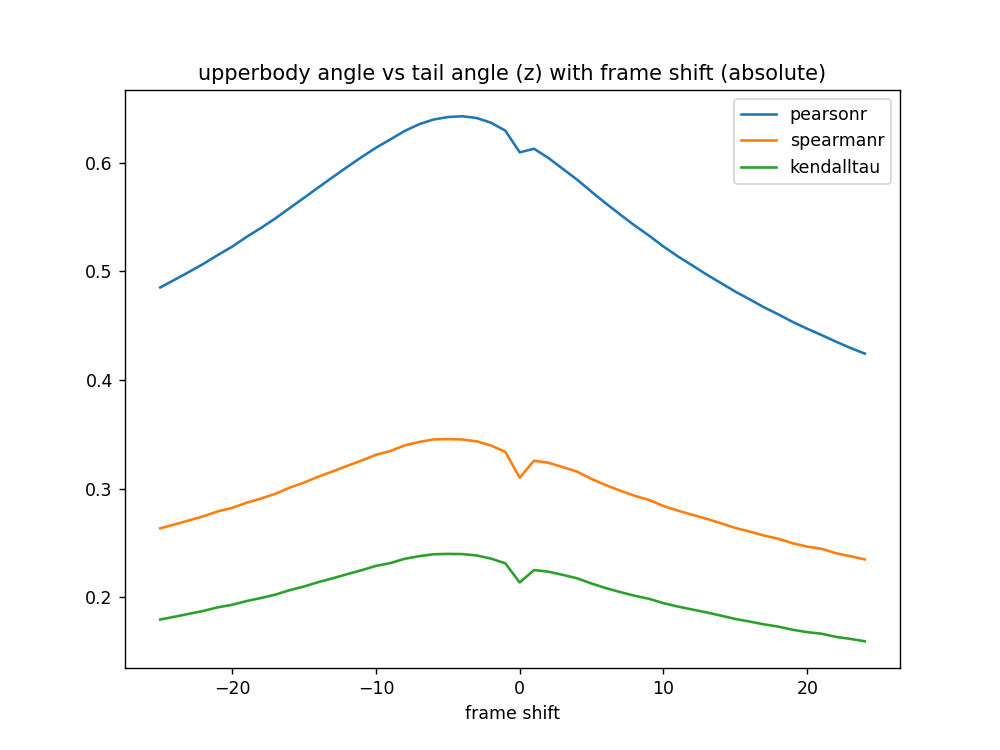

In [15]:
shift_corr_angle_body_tail_z = corr_shift([abs(i) for i in upperbody_angles_z[0]], [abs(i) for i in tail_angles_z[0]], [-25,25])
plot_corr_shift(shift_corr_angle_body_tail_z, "upperbody angle vs tail angle (z) with frame shift (absolute)")

In [16]:
shift_corr_speed_tailxy_thorax = corr_shift([abs(i) for i in speed_tail_angles_xy[0]], abs_speed(speed_xyz[0], 1), [-20,20])

<IPython.core.display.Javascript object>


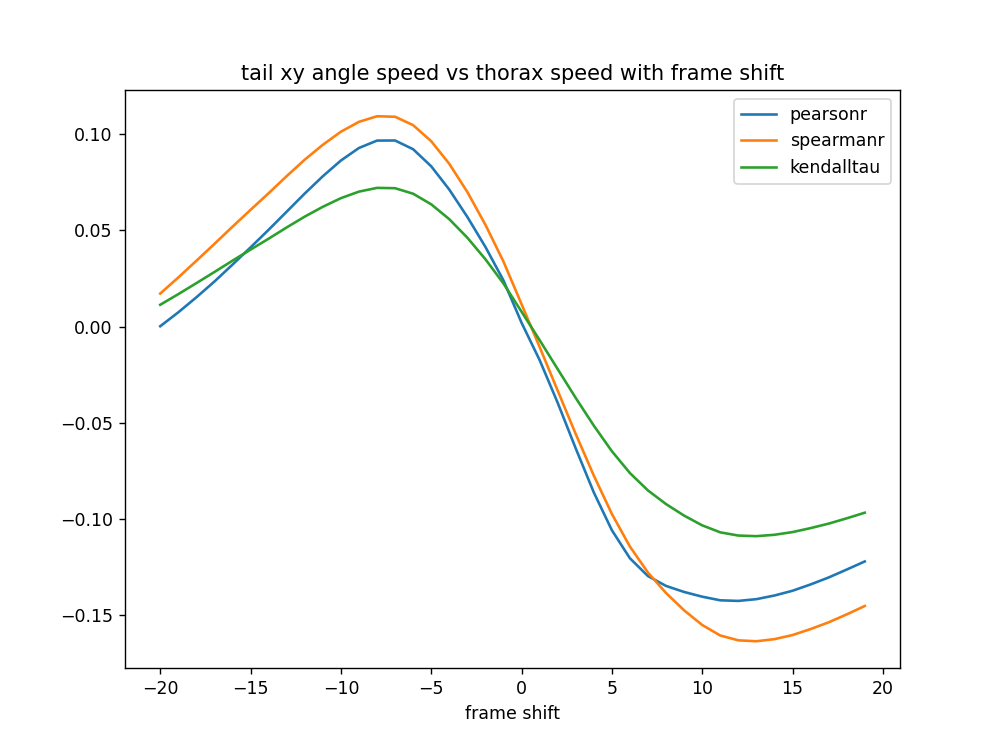

In [17]:
plot_corr_shift(shift_corr_speed_tailxy_thorax, "tail xy angle speed vs thorax speed with frame shift")

In [18]:
shift_corr_tailxy_thoraxspeed = corr_shift(tail_angles_xy[0], abs_speed(speed_xyz[0], 1), [-20,20])

<IPython.core.display.Javascript object>


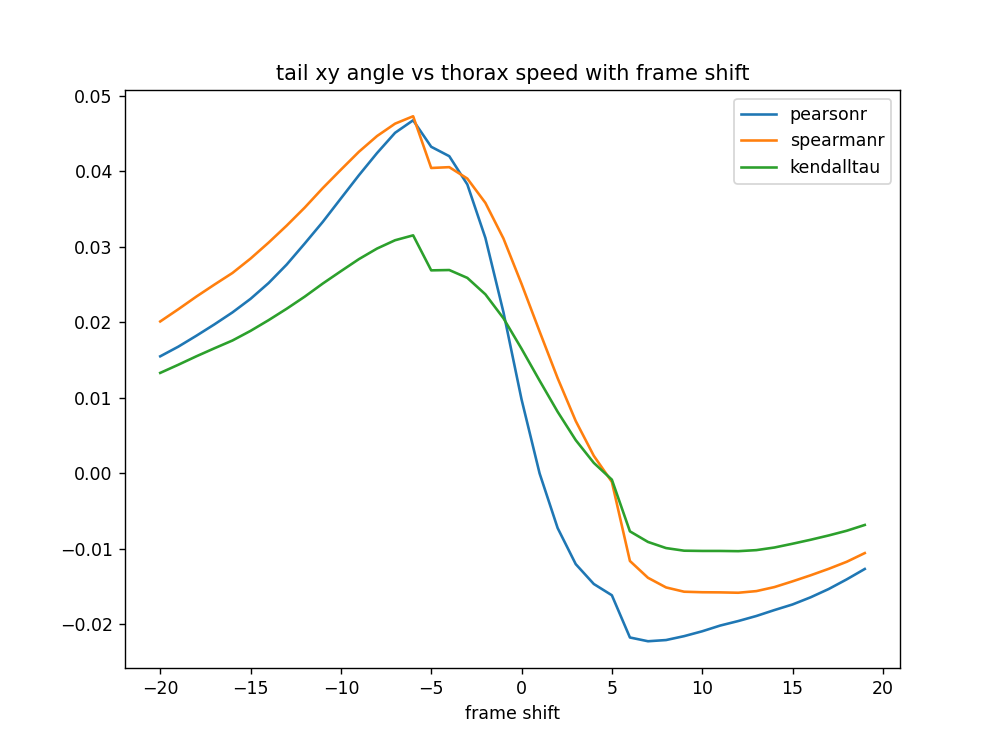

In [19]:
plot_corr_shift(shift_corr_tailxy_thoraxspeed, "tail xy angle vs thorax speed with frame shift")

In [20]:
print(correlation([abs(i) for i in tail_angles_xy[0]], abs_speed(speed_xyz[0], 1), 5))

([-0.0816760270848974, -0.05157698680329042, -0.034544543052776745], [0.0, 0.0, 0.0])


In [21]:
shift_corr_speedbody_tail_xy = corr_shift(tail_angles_xy[0], speed_upperbody_angles_xy[0], [-10,10])

<IPython.core.display.Javascript object>


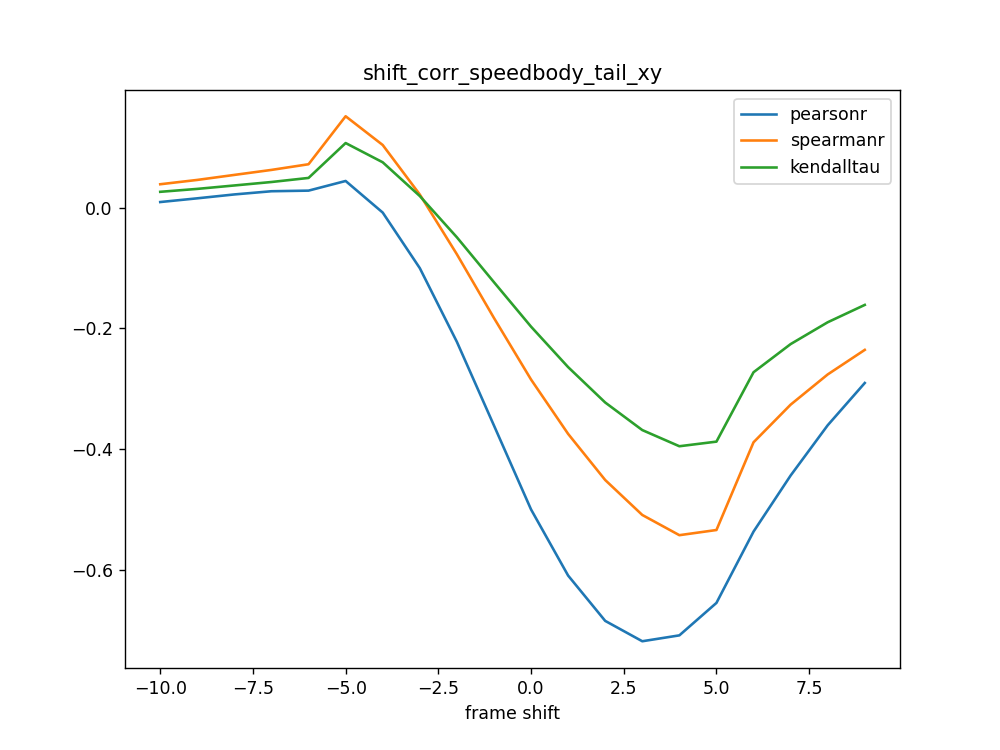

In [22]:
plot_corr_shift(shift_corr_speedbody_tail_xy, "shift_corr_speedbody_tail_xy")

# Correlation matrix

<IPython.core.display.Javascript object>


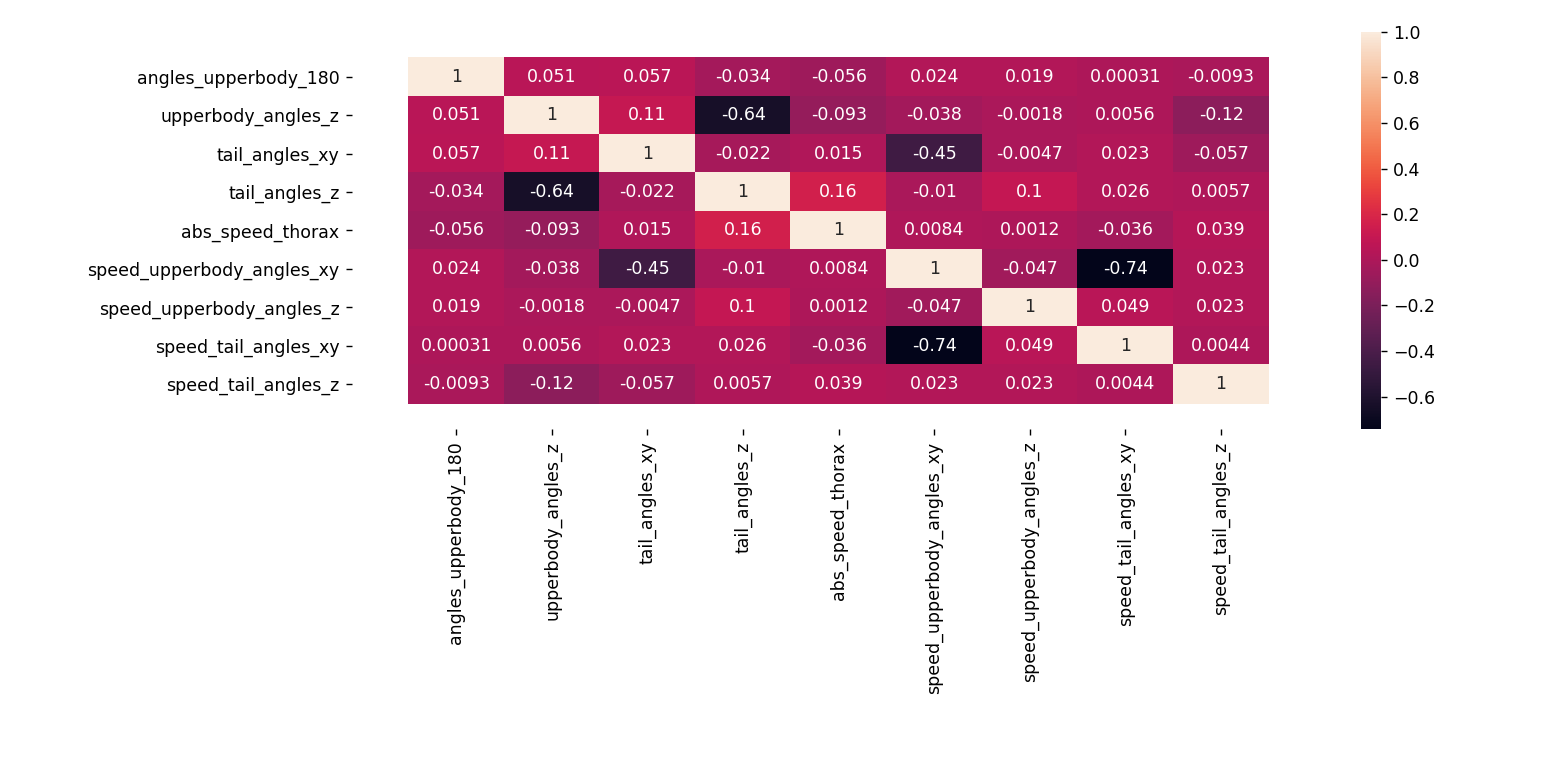

In [23]:
correlation_matrix(0)

<IPython.core.display.Javascript object>


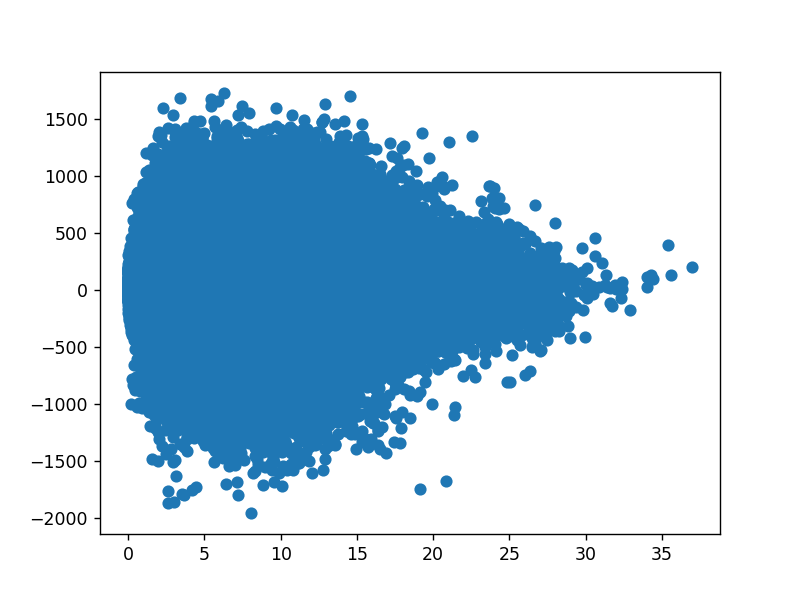

In [71]:
plt.figure()
plt.scatter(abs_speed(speed_xyz[0], 1)[7:-1], speed_tail_angles_xy[0][0:-8])
plt.show()

# Correlation by parts

In [73]:
data1 = speed_upperbody_angles_xy[0]
data2 = speed_tail_angles_xy[0]
size = 50
ays4 = correlation_parts(data1, data2, size)
histogram_plot([ays4])

<IPython.core.display.Javascript object>

In [25]:
# low_corr_startframe = []
# for i in range(len(ays4)):
#     if abs(ays4[i]) < 0.25:
#         low_corr_startframe.append(i*size)
# print(low_corr_startframe, len(low_corr_startframe))

In [26]:
# for i in np.column_stack((framenumbers, [int(x/6000 + 7) for x in framenumbers])):
#     print(i[0], i[0] + size, i[1])

In [27]:
# print(i+140)

In [28]:
def find_peaks(dataset, threshold):
    peaks = []
    for i in range(1, len(dataset)):
        if abs(dataset[i]) > threshold:
            if dataset[i] < 0 and dataset[i] < dataset[i-1] and dataset[i+1] > dataset[i]:
                peaks.append(i)
            elif dataset[i] > 0 and dataset[i] > dataset[i-1] and dataset[i+1] < dataset[i]:
                peaks.append(i)
            else:
                continue
    return(peaks)

In [29]:
peaks = find_peaks(data1[0:6000], 500)
print(peaks)

[1015, 1019, 1021, 1080, 1301, 1335, 1339, 1363, 1380, 1526, 1548, 1656, 1664, 2331, 2416, 2631, 2658, 2741, 2816, 2896, 2923, 2927, 3064, 3123, 3159, 3240, 3326, 3328, 3342, 3350, 3706, 3807, 3820, 3888, 3941, 4034, 4376, 4598, 4712, 4732, 4946, 5109, 5175, 5232, 5234, 5376, 5464, 5527, 5529, 5586, 5675, 5784, 5808, 5862]


In [30]:
peaks2 = []
for i in range(1, len(peaks)-1):
    if peaks[i+1]-peaks[i] < 10:
        continue
    elif peaks[i]-peaks[i-1] < 10:
        peaks2.append(peaks[i])
    else:
        peaks2.append(peaks[i])

<IPython.core.display.Javascript object>


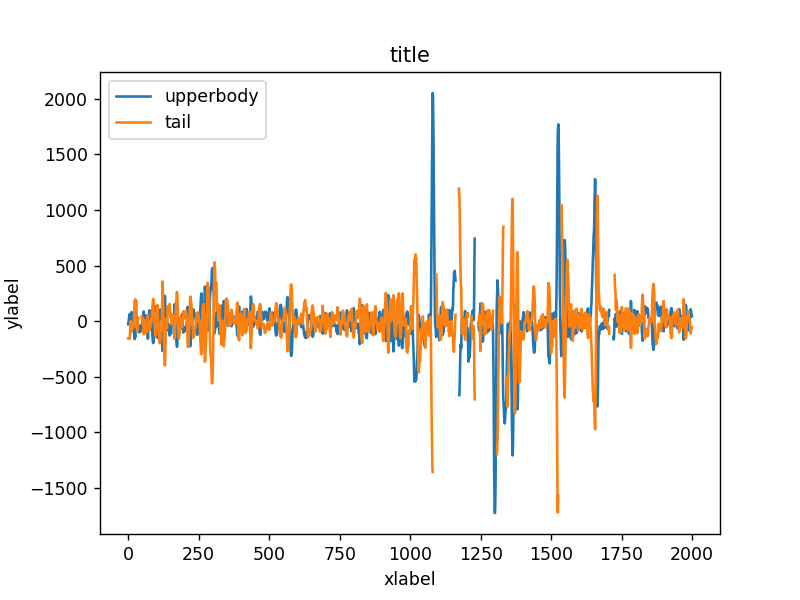

<IPython.core.display.Javascript object>


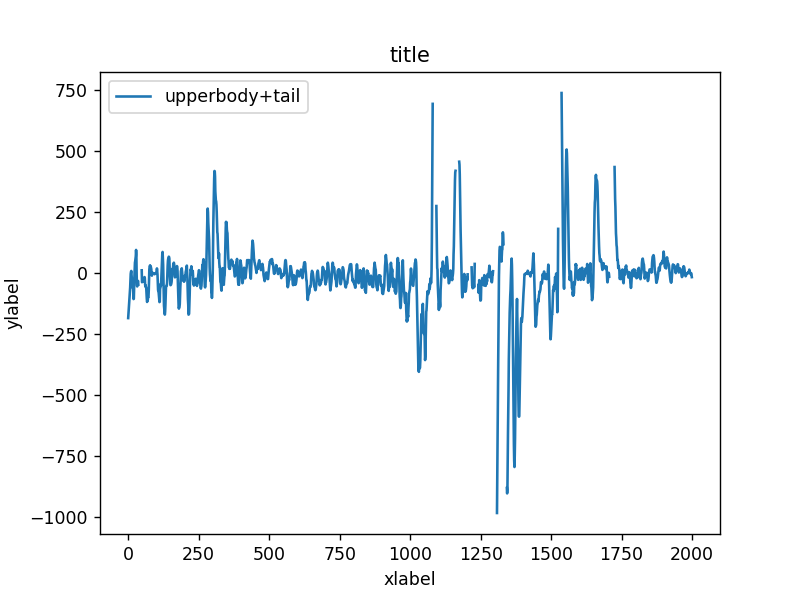

In [76]:
scatter_plot([data1[1000:2000], data2[0:2000]], labels=['upperbody', 'tail'])
# for i in peaks2:
#     plt.vlines(i, -2000, 2000,color="red")
    
scatter_plot([data1[0:2000]+data2[0:2000]], labels=['upperbody+tail'])

In [32]:
# print(correlation(data1[37150:32175], data2[37150:32175], 0)[0])
# print(correlation(data1[37150:32200], data2[37150:32200], 0)[0])
# print(correlation(data1[37150:32200], data2[37150:32200], 0)[0])

In [33]:
# j = 0

In [34]:
# i = low_corr_startframe[j]
# scatter_plot([data1[i:i+size], data2[i:i+size]], labels=['upperbody', 'tail'])
# j+=1

In [52]:
print(peaks2)

[1021, 1080, 1301, 1339, 1363, 1380, 1526, 1548, 1664, 2331, 2416, 2631, 2658, 2741, 2816, 2896, 2927, 3064, 3123, 3159, 3240, 3328, 3350, 3706, 3807, 3820, 3888, 3941, 4034, 4376, 4598, 4712, 4732, 4946, 5109, 5175, 5234, 5376, 5464, 5529, 5586, 5675, 5784, 5808]


<IPython.core.display.Javascript object>


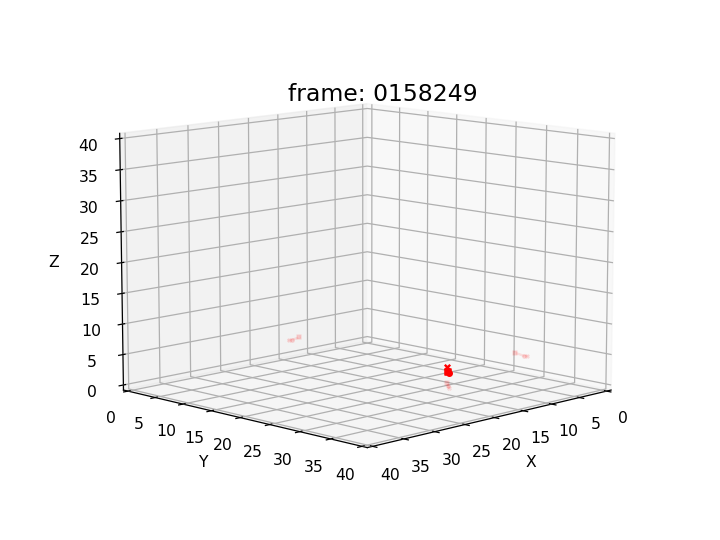

13.68555736541748


In [8]:
# make the movie
t0 = time.time()

# frame range
f0 = 157950
fE = 158250

make_movie(data_3D_filtered[0], f0, fE, savePath='./check_acc5.mp4')

tE = time.time()
print(tE-t0)

<IPython.core.display.Javascript object>


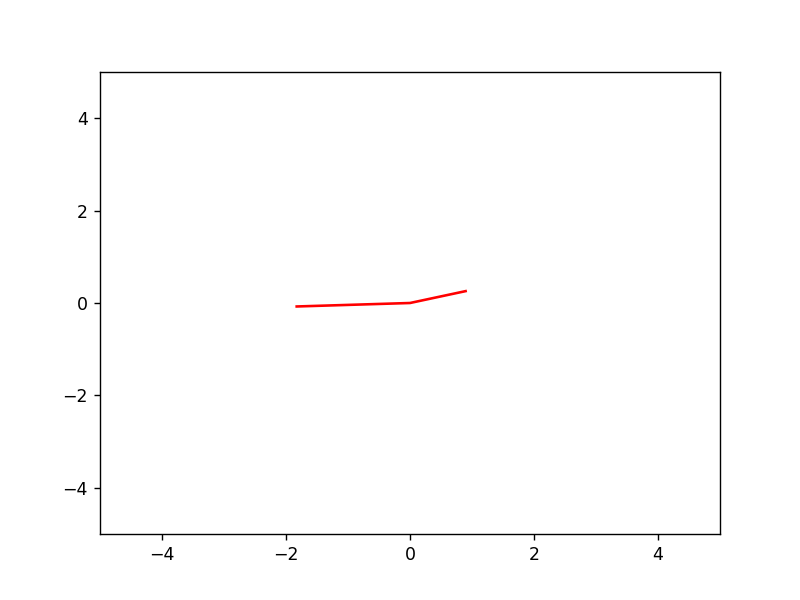

In [106]:
fig = plt.figure()
ax = fig.add_subplot(111)
i = data_3D[0][1360]
line1, = ax.plot([j[0]-i[0][1][0] for j in i[0]],[j[1]-i[0][1][1] for j in i[0]], 'r-') # Returns a tuple of line objects, thus the comma
plt.xlim(-5,5)
plt.ylim(-5,5)
for i in data_3D[0][1361:1400]:
    line1.set_ydata([j[0]-i[0][1][0] for j in i[0]])
    line1.set_xdata([j[1]-i[0][1][1] for j in i[0]])
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    plt.pause(0.1)
#     plt.scatter([j[0] for j in i[0]],[j[1] for j in i[0]])


# plt.figure()
# for i in data_3D_filtered[0][1361:1400]:
#     plt.plot([j[0] for j in i[0]],[j[1] for j in i[0]])
#     plt.scatter([j[0] for j in i[0]],[j[1] for j in i[0]])

<IPython.core.display.Javascript object>


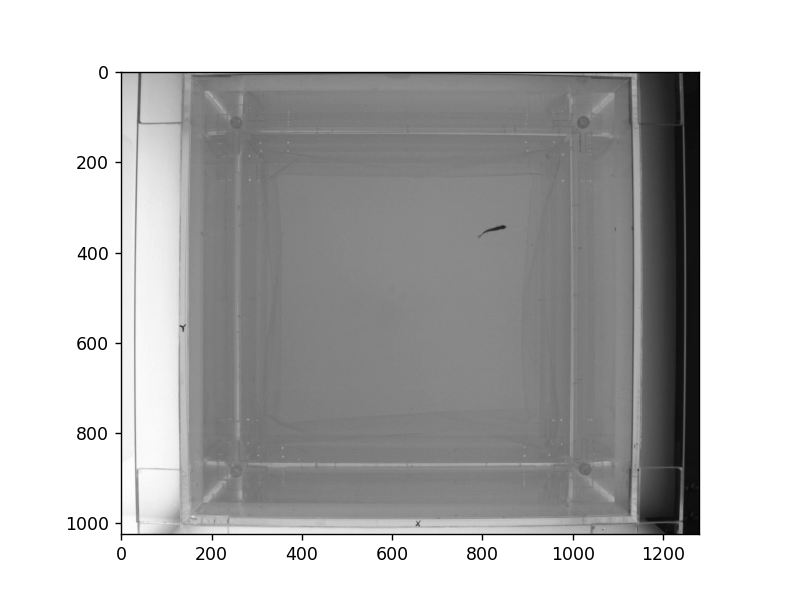

In [7]:
video_007 = '/home/thomasreus/Documents/zebrafish_labeling_GUI/OneFish_20200416/E_xy/splitdata0007.mp4'
vidcap = cv2.VideoCapture(video_007)
success,image = vidcap.read()
count = 0
plt.figure()
plt.imshow(image,cmap='gray')
# while success:
    
#     success,image = vidcap.read()
    